In [1]:
import pandas as pd
import gensim
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [2]:
data = pd.read_csv('t_asv.csv')
data.head()

,field,field.1,field.2,field.3,field.4
0,1001001,1,1,1,In the beginning God created the heavens and t...
1,1001002,1,1,2,And the earth was waste and void; and darkness...
2,1001003,1,1,3,"And God said, Let there be light: and there wa..."
3,1001004,1,1,4,"And God saw the light, that it was good: and G..."
4,1001005,1,1,5,"And God called the light Day, and the darkness..."


# Data cleaning

In [3]:
import re

#remove ponctuation
data['field.4'] = data['field.4'].map(lambda x:re.sub('[,:;\.!?]', '', x))
data.head()                                

,field,field.1,field.2,field.3,field.4
0,1001001,1,1,1,In the beginning God created the heavens and t...
1,1001002,1,1,2,And the earth was waste and void and darkness ...
2,1001003,1,1,3,And God said Let there be light and there was ...
3,1001004,1,1,4,And God saw the light that it was good and God...
4,1001005,1,1,5,And God called the light Day and the darkness ...


In [4]:
#convert to lowercase
data['field.4'] = data['field.4'].map(lambda x:x.lower())
data.head()

,field,field.1,field.2,field.3,field.4
0,1001001,1,1,1,in the beginning god created the heavens and t...
1,1001002,1,1,2,and the earth was waste and void and darkness ...
2,1001003,1,1,3,and god said let there be light and there was ...
3,1001004,1,1,4,and god saw the light that it was good and god...
4,1001005,1,1,5,and god called the light day and the darkness ...


In [5]:
#remove stop word
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS

def preprocess(txt):
    preproc = ""
    for token in simple_preprocess(txt):
        if(token not in STOPWORDS and len(token)):
            preproc = preproc+' '+token
    return preproc

In [6]:
#test preprocess function
test_txt = data.iloc[0,4]
print(test_txt)
preproc_txt = preprocess(test_txt)
print(preproc_txt)

in the beginning god created the heavens and the earth
 beginning god created heavens earth


# EDA

In [7]:
data['processed'] = data['field.4'].map(lambda x:preprocess(x))

In [8]:
data.iloc[1,5]

' earth waste void darkness face deep spirit god moved face waters'

## WordCloud

In [9]:
!pip install wordcloud  
from wordcloud import WordCloud

In [10]:
long_string = ','.join(data['processed'].values)

In [11]:
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

In [12]:
wordcloud.generate(long_string)

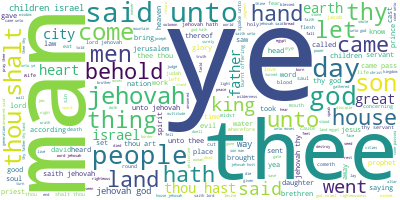

In [13]:
wordcloud.to_image()